In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker

import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp

datadir = '../../../code/maxent/data'
figdatadir = './'

In [13]:
uniform_matrix =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [5]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [6]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [14]:
models = [
'Humanviruses_independent',
'Humanviruses_nskewfcov',
'Humanviruses_train',
'Malaria_independent',
'Malaria_ncov',
'Malaria_nskew',
'Malaria_nskewfcov',
'Malaria_train',
'Malaria_test',
'Mouse_train'
]

In [25]:
ns_dict = {}
ps_dict = {}
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

In [28]:
ns_dict['uniform'] = mat_to_dist(uniform_matrix)
ps_dict['uniform'] = ns_dict['uniform']/np.sum(ns_dict['uniform'])
ps_dict['uniform'][0] = len(reference)/20**k

In [33]:
ps

array([np.float64(0.00015), np.float64(0.01288), np.float64(0.43223),
       '0.55474'], dtype=object)

In [32]:
ps_flat

array([2.03306406e-05, 3.58000000e-03, 1.89650000e-01, 8.06740000e-01])

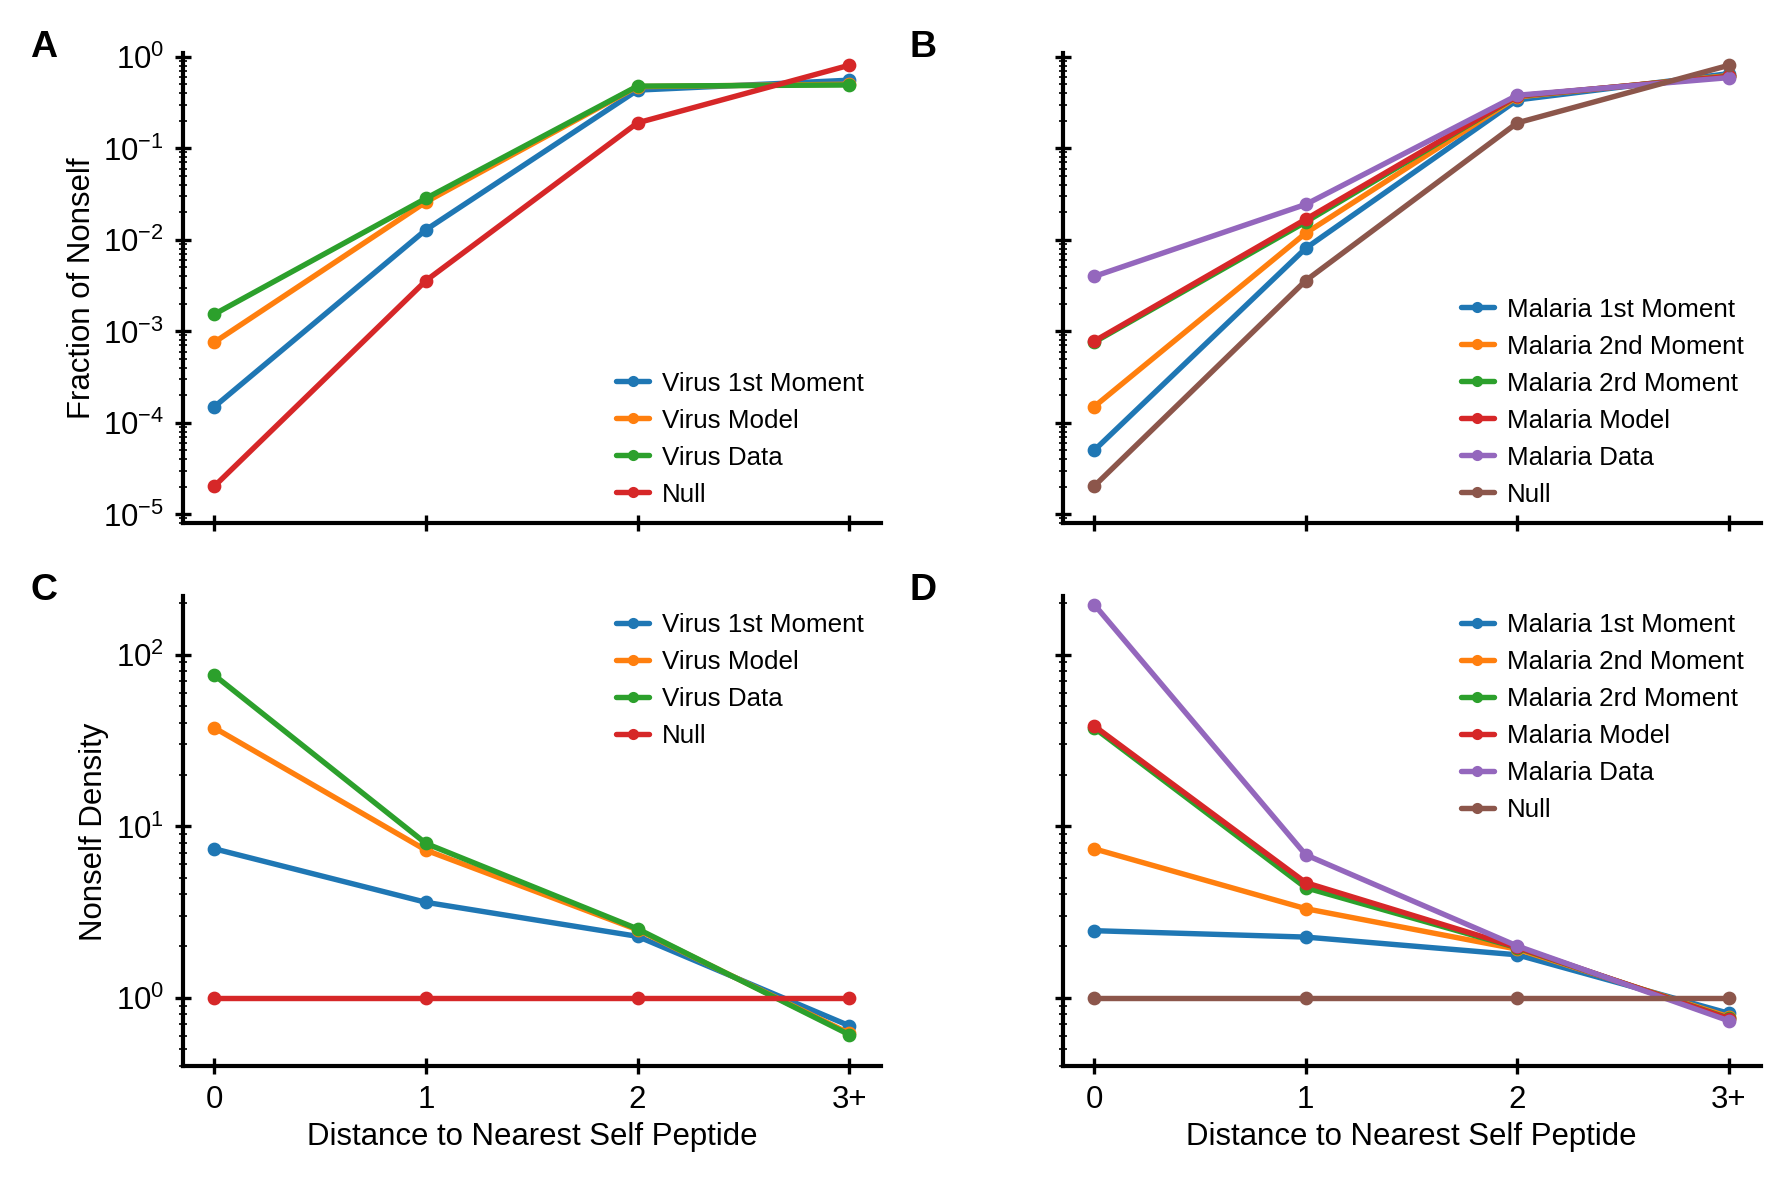

In [35]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 2rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')]

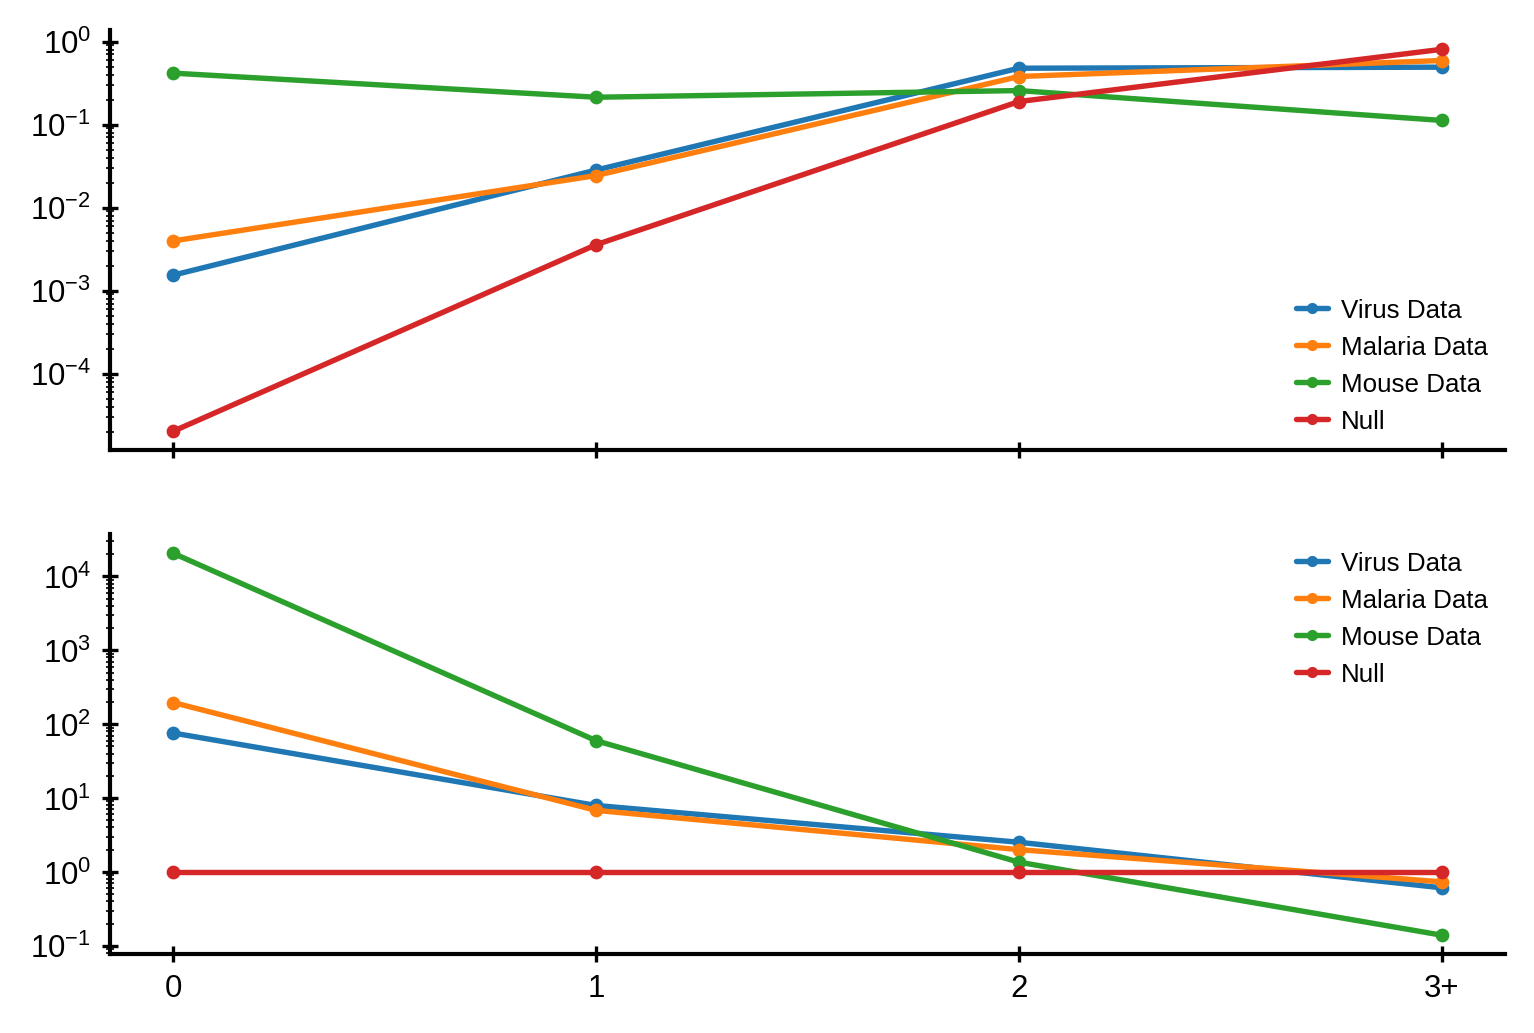

In [38]:
fig, ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=1,sharex=True)
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Malaria_train','Mouse_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    ax[0].plot(range(4), ps, '-o', label=model_to_label[model])
    ax[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([0, 1, 2, '3+'])



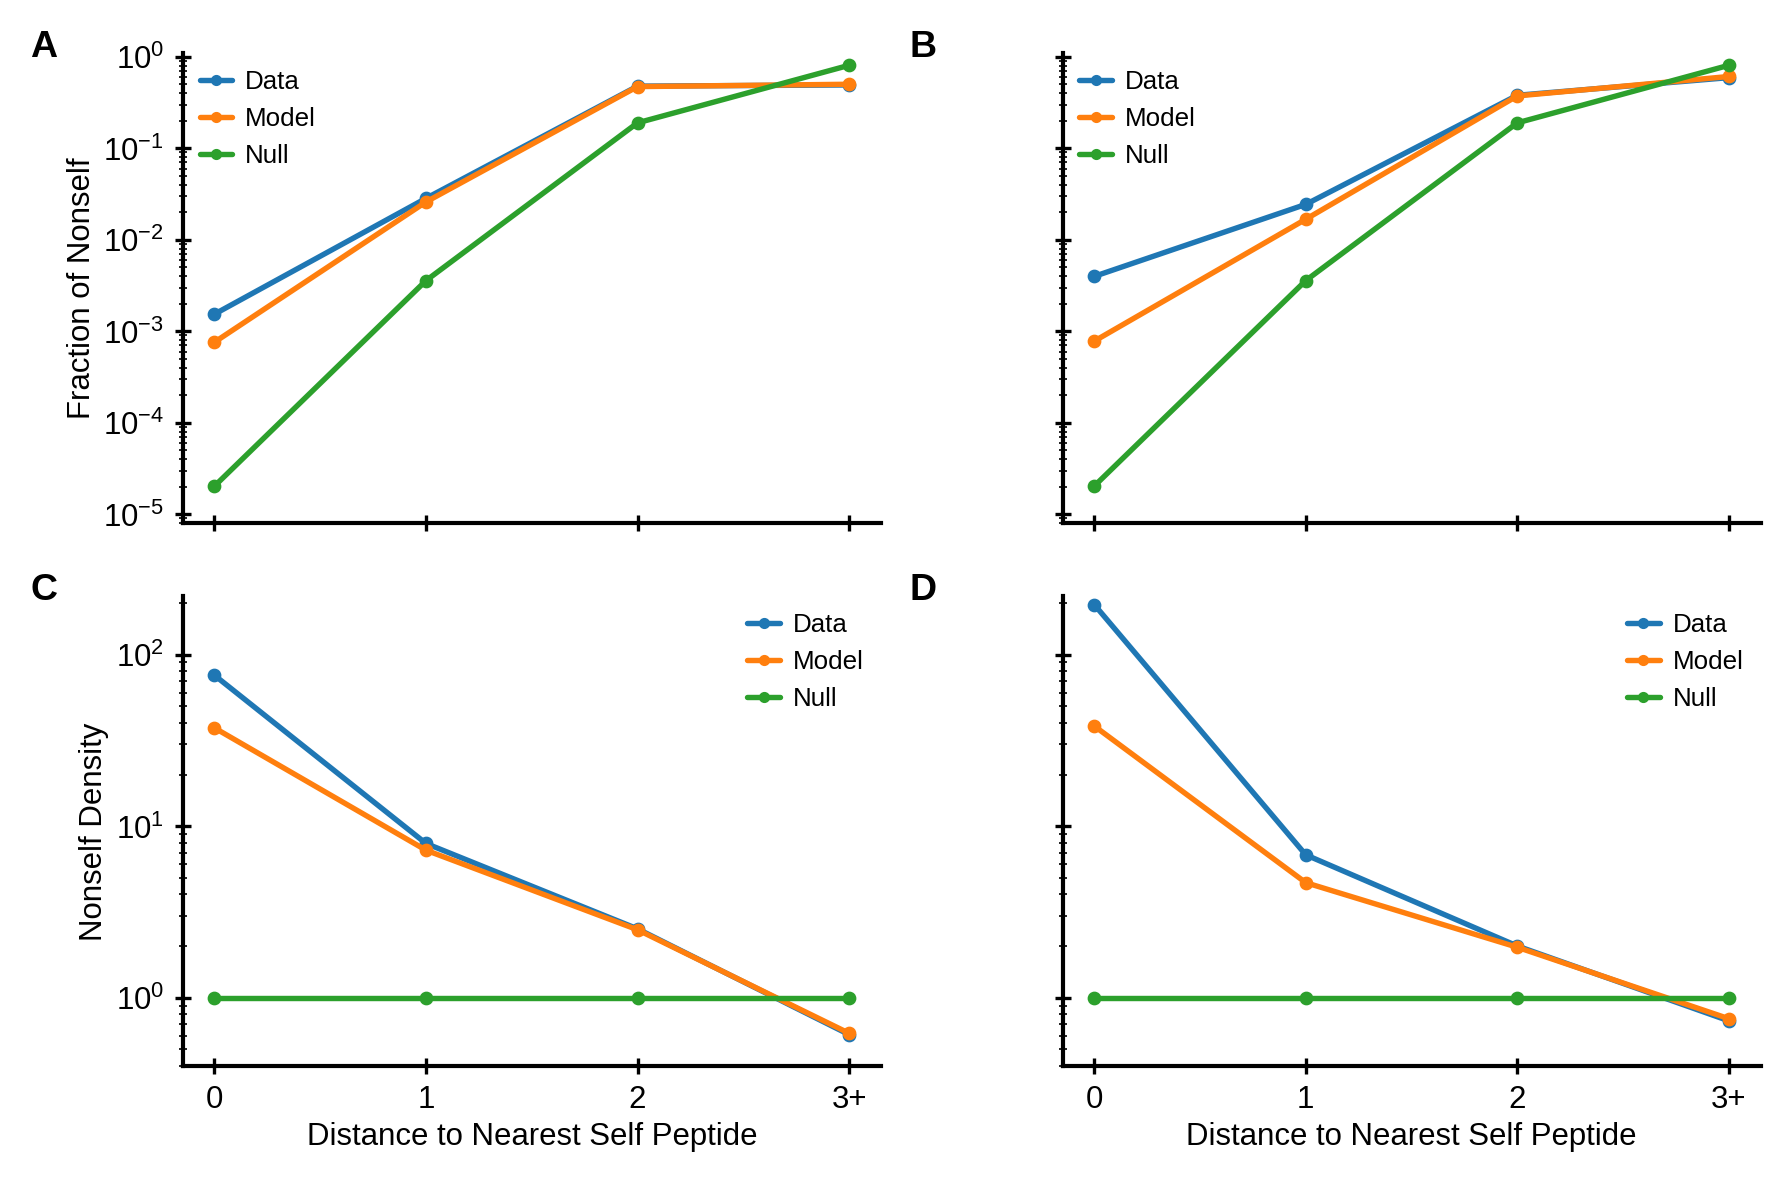

In [42]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_not_annotated.png')
plt.savefig('../fig3_not_annotated.svg')